In [1]:
#LSTM - RNN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
datasetTrain = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
#create numpy array using .values
trainingSet = datasetTrain.iloc[ : , 1:2].values

In [4]:
#Feature Scaling can be done in two methods
# 1 - Standardisation : Xstand = ( x - mean( x ) ) / (standardDeviation( x ) )
# 2 - Normalisation : Xnorm = ( x - min( x ) ) / ( ( max( x ) - min( x ) ) )
#Normalisation is recomended to RNN

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler( feature_range = ( 0 , 1 ) )
trainingSetScaled = scaler.fit_transform( trainingSet )
trainingSetScaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [6]:
#specify data structure on what RNN need to remember when predicting the next stock price
#This is called the number of "time" steps
#having wrong number of time steps could lead to over fitting or nonsense predictions
#60 timesteps means that RNN is goign to look at 60 stock prices before time T,
#that is the stock prices between 60 days before time T and time T,
#and based on the trends it captures during thse 60 previous timesteps,
#it will try to predict the next output. 1 output that is at T + 1.

In [7]:
xTrain = []
yTrain = []
for i in range( 60 , len( trainingSetScaled ) ):
    xTrain.append( trainingSetScaled[ i - 60 : i , 0 ] )
    yTrain.append( trainingSetScaled[ i , 0 ] )
xTrain , yTrain = np.array( xTrain ) , np.array( yTrain )
#here we create xTrain as a matrix in which the 1st record has data of the first 60 days
#and yTrain has the value of the 61st day

In [8]:
#Reshaping as required for the RNN in keras
#( batch_size , timesteps , input_dim )
xTrain = np.reshape( xTrain , ( xTrain.shape[0] , xTrain.shape[1] , 1 ) )
xTrain

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [10]:
regressor = Sequential()
#adding a LSTM layer
#units -> number of neurons
#return_sequence -> indicates that there will be a next RNN layer after this
#input_shape -> takes timesteps and input_dim as the input, the batch_size is taken default.
#dropout drops 20% of the neurons in each steps of training. i.e leave 10 neurons in each iteration in this case.
regressor.add( LSTM( units = 50 , return_sequences = True , input_shape = ( xTrain.shape[1] , 1 ) ) )
regressor.add( Dropout( 0.2 ) )

In [11]:
#2nd layer, it gets the input_shape from the previous layer, so don't have to give the input_shape explicily.
regressor.add( LSTM( units = 50 , return_sequences = True ) )
regressor.add( Dropout( 0.2 ) )
#3rd layer
regressor.add( LSTM( units = 50 , return_sequences = True ) )
regressor.add( Dropout( 0.2 ) )
#4th layer, since this is the last layer, return_sequences should be false, and as default it is...
regressor.add( LSTM( units = 50 ) )
regressor.add( Dropout( 0.2 ) )

In [12]:
#Output layer
regressor.add( Dense( units = 1 ) )

In [13]:
regressor.compile( optimizer = 'adam' , loss = 'mean_squared_error' )

In [14]:
regressor.fit( xTrain , yTrain , epochs = 100 , batch_size = 32 )

Epoch 1/100
38/38 [==============================] - 9s 102ms/step - loss: 0.0386
Epoch 2/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0053
Epoch 7/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0051
Epoch 9/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0046
Epoch 12/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0044
Epoch 13/100
38/38 [====

In [15]:
datasetTest = pd.read_csv('Google_Stock_Price_Test.csv')
realStockPrice = datasetTest.iloc[ : , 1:2].values
realStockPrice

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [16]:
#Getting the predicted stock price of 2017
datasetTotal = pd.concat( ( datasetTrain['Open'] , datasetTest['Open'] ) , axis = 0 )
inputs = datasetTotal[ len( datasetTotal ) - len( datasetTest ) - 60 : ].values
inputs = inputs.reshape( -1,1 )
inputs = scaler.transform( inputs )

xTest = []
for i in range( 60 , 60 + len( realStockPrice ) ):
    xTest.append( inputs[ i - 60 : i , 0 ] )

xTest = np.array( xTest )

xTest = np.reshape( xTest , ( xTest.shape[0] , xTest.shape[1] , 1 ) )

predictedStockPrice = regressor.predict( xTest )

#the output is given as scaled values, so we inverse/reverse the scale to get the actual value
predictedStockPrice = scaler.inverse_transform( predictedStockPrice )
predictedStockPrice

1/1 [==============================] - 1s 1s/step


array([[749.69354],
       [746.87787],
       [747.3873 ],
       [748.9109 ],
       [752.1145 ],
       [757.6145 ],
       [762.2291 ],
       [763.461  ],
       [763.2137 ],
       [762.97   ],
       [763.1151 ],
       [763.32306],
       [763.49634],
       [764.23083],
       [765.20105],
       [769.8154 ],
       [776.412  ],
       [783.024  ],
       [785.8667 ],
       [780.6312 ]], dtype=float32)

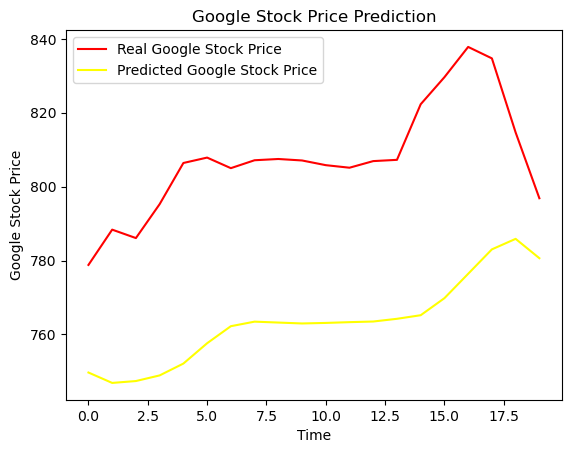

In [17]:
#visualizing the results
plt.plot( realStockPrice , color = 'red' , label = 'Real Google Stock Price')
plt.plot( predictedStockPrice , color = 'Yellow' , label = 'Predicted Google Stock Price')
plt.title( 'Google Stock Price Prediction' )
plt.xlabel( 'Time' )
plt.ylabel( 'Google Stock Price' )
plt.legend()
plt.show()